In [58]:
##%matplotlib widget

import os, time, sys
import importlib
import tables as tb
import matplotlib.pyplot as plt
import numpy as np
#import clicfast2023.clicfast2023 as clicfast2023
import clicfast2023.analysis.interpreter as interpreter
import clicfast2023.analysis.event_builder as event_builder
import clicfast2023.analysis.fitfunctions as fitfunctions
import clicfast2023.analysis.data_loader as data_loader

importlib.reload(data_loader)
importlib.reload(interpreter)
importlib.reload(fitfunctions)
importlib.reload(event_builder)

datdir = '/home/thirono/cernbox/clicfast2022/th_tuning'

In [59]:
importlib.reload(data_loader)
flist=[]
for fname in np.sort(os.listdir(datdir)):
    if 'scan.h5'==fname[-7:]:
        flist.append(os.path.join(datdir, fname))

fraw, fhit = data_loader.get_filename(flist[0])
print(fraw)
param, additional = data_loader.get_scan_param(fraw, conf_name=["inj.REPEAT"])
print(fhit)
inj_n = additional['inj.REPEAT']
dat = data_loader.get_all_data(fhit)
ret = data_loader.get_scurves(dat, param, fitting=False)

/home/thirono/cernbox/clicfast2022/th_tuning/20240521_102757_th_scan.h5
/home/thirono/cernbox/clicfast2022/th_tuning/20240521_102757_th_hit.h5
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/thirono/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_349373/2611100788.py", line 13, in <module>
    ret = data_loader.get_scurves(dat, param, fitting=False)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/thirono/Nextcloud-kit/workspace/clicfast2023/kit-gitlab/clicfast2023/analysis/data_loader.py", line 85, in get_scurves
    ret[u_i]['col'] = upix['col']
    ~~~~~~~~^^^^^^^
ValueError: no field of name col

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/thirono/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/thirono/miniconda3/lib/python3.11/si

(0.1940136540392848, 0.04620115475869546)

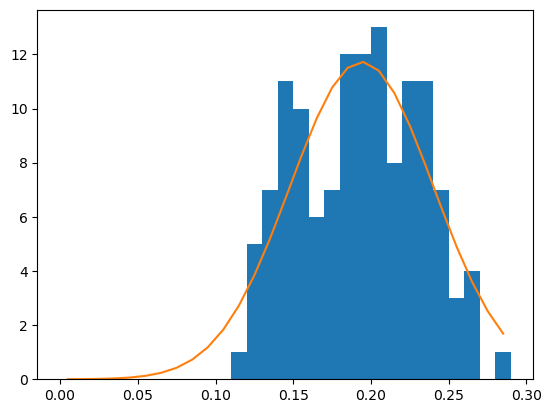

In [21]:
hist = plt.hist(ret['quick_th'], bins=np.arange(0,0.3,0.01))
x = (hist[1][1:]+hist[1][:-1])*0.5
y = hist[0]
fit = fitfunctions.fit_gauss(x, y)
plt.plot(x, fitfunctions.gauss(x, *fit[:3]))
fit[1], fit[2]

In [64]:
fraw, fhit = data_loader.get_filename(flist[1])
dat = data_loader.analyze(fraw, fhit)
param, additional = data_loader.get_scan_param(fraw, conf_name=["inj.REPEAT"])
print(fhit)
inj_n = additional['inj.REPEAT']
dat = data_loader.get_all_data(fhit)
#ret = data_loader.get_scurves(dat, param, fitting=False)


2024-05-27 15:19:46,492 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/th_tuning/20240527_151620_th_hit.h5


0.72s 164956/164956 hit=28851 ts=6900 trig=0


2024-05-27 15:19:46,694 - root - [INFO    ] (MainThread) 0.20s hit=28851/28851 event=28851 ts=6900/6900
2024-05-27 15:19:46,695 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/th_tuning/20240527_151620_th_hit.h5


/home/thirono/cernbox/clicfast2022/th_tuning/20240527_151620_th_hit.h5


[('scan_param_id', '<i4'), ('timestamp', '<f8'), ('inj', '<f4'), ('tdac', 'u1')]
+++++++++++++ (0,) 68 28840
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
+++++++++++++ (7,) 1 11
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 11)


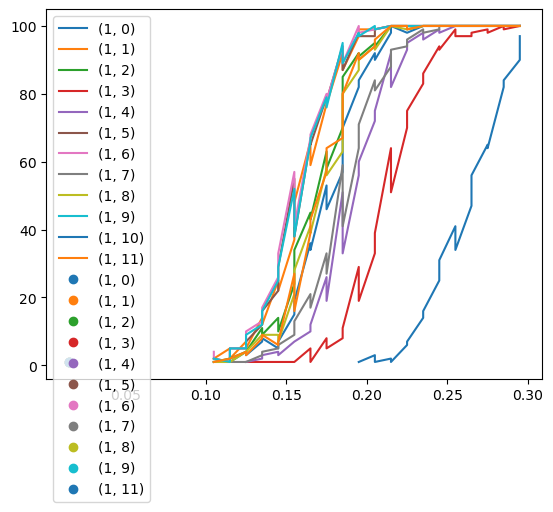

In [70]:
dat = data_loader.get_all_data(fhit)
dtype=[('fit','f',6),('quick_th', 'f'), ('col', 'i'), ('comp', 'i')]
print(param.dtype)
if len(param.dtype)>3:
       names = [*param.dtype.names[3:]]

# for i, n in enumerate(names):
#     #if n=='cols' :
#     #    names[i]='col'
#     #elif n=='comps':
#     #    names[i]='comp'
#     else:
#         dtype.append((n,'i'))
# dtype

upara = np.unique(param[[*param.dtype.names[3:]]])
clean_data = True
sym=['-', 'o']
for up_i, up in enumerate(upara):
    ev = param['scan_param_id'][param[[*param.dtype.names[3:]]]==up]
    dat0 = dat[np.isin(dat['event_number'],ev)]
    print('+++++++++++++',up, len(ev), len(dat0))
    unipix = np.unique(dat0[['col', 'comp']])
    for u_i, upix in enumerate(unipix):
        print(upix)
        ret[u_i]['col'] = upix['col']
        ret[u_i]['comp'] = upix['comp']
        dat1 = dat0[dat0[['col', 'comp']]==upix]
        if clean_data:
            _, idx= np.unique(dat1['timestamp'], return_index=True)
            dat1 = dat1[idx]
        uni, nhit = np.unique(dat1['event_number'], return_counts=True)

        arg = np.argsort(param['inj'][uni])
        x = param['inj'][uni][arg]
        y = nhit[arg]
        plt.plot(x, y, 'C{}{}'.format(u_i%10, sym[up_i]), label=upix)
plt.legend()

In [28]:
if len(param.dtype)>2:
    names = [*param.dtype.names[1:]]
if 'cols' in names:
    names[names=='cols']='col'
else:
    np.append(names, 'col')
if 'comps' in names:
    names[names=='comps']='comp'
else:
    np.append(names, 'comp')

In [48]:
param.dtype

dtype([('scan_param_id', '<i4'), ('timestamp', '<f8'), ('inj', '<f4'), ('tdac', 'u1')])